<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/2.%20Marketing%20and%20Customer%20Analysis/Bank%20Customer%20Churn%20Prediction/Predicting_Churn_for_Bank_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset Link](https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers)

# Preparing Project

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Downloading Dataset From Kaggle

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
# Download Dataset
!kaggle datasets download -d adammaus/predicting-churn-for-bank-customers

Dataset URL: https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers
License(s): unknown
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 77.7MB/s]


In [5]:
# Unzip Dataset
!unzip /content/predicting-churn-for-bank-customers.zip

Archive:  /content/predicting-churn-for-bank-customers.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Churn_Modelling.csv     


## Importing Dataset

In [113]:
df = pd.read_csv("/content/Churn_Modelling.csv")

# Dataset Exploration

## Getting to Know The DataFrame

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1. **RowNumber**: Index of the row in the dataset.
2. **CustomerId**: Unique identifier for each customer.
3. **Surname**: Customer's last name.
4. **CreditScore**: Customer's credit score.
5. **Geography**: Country of residence of the customer.
6. **Gender**: Gender of the customer.
7. **Age**: Age of the customer.
8. **Tenure**: Number of years the customer has been with the bank.
9. **Balance**: Account balance of the customer.
10. **NumOfProducts**: Number of bank products the customer uses.
11. **HasCrCard**: Indicates if the customer has a credit card (1: Yes, 0: No).
12. **IsActiveMember**: Indicates if the customer is an active member (1: Yes, 0: No).
13. **EstimatedSalary**: Estimated annual salary of the customer.
14. **Exited**: Indicates if the customer has exited the bank (1: Yes, 0: No).

## Understanding DataFrame Stracture

In [8]:
df.shape

(10000, 14)

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Check Variables Datatype

In [10]:
df.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [13]:
df.select_dtypes(include='number').columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Statistical Summary

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Statistical Summary Analysis:**


1. **RowNumber**:
   - **Count**: 10000 entries.
   - **Mean**: 5000.5.
   - **Std (Standard Deviation)**: 2886.895680.
   - **Min**: 1.
   - **25% (First Quartile)**: 2500.75.
   - **50% (Median or Second Quartile)**: 5000.5.
   - **75% (Third Quartile)**: 7500.25.
   - **Max**: 10000.

   This variable seems to be a sequential row number or identifier, ranging from 1 to 10000.

2. **CustomerId**:
   - **Count**: 10000 entries.
   - **Mean**: 15690940.
   - **Std (Standard Deviation)**: 71936.186123.
   - **Min**: 15565701.
   - **25% (First Quartile)**: 15628528.25.
   - **50% (Median or Second Quartile)**: 15690740.
   - **75% (Third Quartile)**: 15753230.
   - **Max**: 15815690.

   Customer IDs range from 15565701 to 15815690, with a mean around 15.69 million.

3. **CreditScore**:
   - **Count**: 10000 entries.
   - **Mean**: 650.5288.
   - **Std (Standard Deviation)**: 96.653299.
   - **Min**: 350.
   - **25% (First Quartile)**: 584.
   - **50% (Median or Second Quartile)**: 652.
   - **75% (Third Quartile)**: 718.
   - **Max**: 850.

   Credit scores range from 350 to 850, with an average score of approximately 651.

4. **Age**:
   - **Count**: 10000 entries.
   - **Mean**: 38.9218 years.
   - **Std (Standard Deviation)**: 10.487806 years.
   - **Min**: 18 years.
   - **25% (First Quartile)**: 32 years.
   - **50% (Median or Second Quartile)**: 37 years.
   - **75% (Third Quartile)**: 44 years.
   - **Max**: 92 years.

   Customer ages range from 18 to 92 years, with an average age of about 39 years.

5. **Tenure**:
   - **Count**: 10000 entries.
   - **Mean**: 5.0128 years.
   - **Std (Standard Deviation)**: 2.892174 years.
   - **Min**: 0 years.
   - **25% (First Quartile)**: 3 years.
   - **50% (Median or Second Quartile)**: 5 years.
   - **75% (Third Quartile)**: 7 years.
   - **Max**: 10 years.

   Tenure (length of relationship with the bank) ranges from 0 to 10 years, with an average around 5 years.

6. **Balance**:
   - **Count**: 10000 entries.
   - **Mean**: 76485.89 units.
   - **Std (Standard Deviation)**: 62397.405202 units.
   - **Min**: 0 units.
   - **25% (First Quartile)**: 0 units.
   - **50% (Median or Second Quartile)**: 97198.54 units.
   - **75% (Third Quartile)**: 127644.2 units.
   - **Max**: 250898.09 units.

   Balances in customer accounts vary widely, from 0 to 250898.09 units, with an average balance of approximately 76485.89 units.

7. **NumOfProducts**:
   - **Count**: 10000 entries.
   - **Mean**: 1.5302 products.
   - **Std (Standard Deviation)**: 0.581654 products.
   - **Min**: 1 product.
   - **25% (First Quartile)**: 1 product.
   - **50% (Median or Second Quartile)**: 1 product.
   - **75% (Third Quartile)**: 2 products.
   - **Max**: 4 products.

   On average, customers have around 1.53 products, ranging from 1 to 4 products.

8. **HasCrCard**:
   - **Count**: 10000 entries.
   - **Mean**: 0.7055 (70.55%).
   - **Std (Standard Deviation)**: 0.45584.
   - **Min**: 0.
   - **25% (First Quartile)**: 0.
   - **50% (Median or Second Quartile)**: 1.
   - **75% (Third Quartile)**: 1.
   - **Max**: 1.

   Approximately 70.55% of customers have a credit card.

9. **IsActiveMember**:
   - **Count**: 10000 entries.
   - **Mean**: 0.5151 (51.51%).
   - **Std (Standard Deviation)**: 0.499797.
   - **Min**: 0.
   - **25% (First Quartile)**: 0.
   - **50% (Median or Second Quartile)**: 1.
   - **75% (Third Quartile)**: 1.
   - **Max**: 1.

   About 51.51% of customers are active members.

10. **EstimatedSalary**:
    - **Count**: 10000 entries.
    - **Mean**: 100090.2 units.
    - **Std (Standard Deviation)**: 57510.492818 units.
    - **Min**: 11.58 units.
    - **25% (First Quartile)**: 51002.11 units.
    - **50% (Median or Second Quartile)**: 100193.9 units.
    - **75% (Third Quartile)**: 149388.2 units.
    - **Max**: 199992.48 units.

    Estimated salaries range from 11.58 to 199992.48 units, with an average salary of approximately 100090.2 units.

11. **Exited**:
    - **Count**: 10000 entries.
    - **Mean**: 0.2037 (20.37%).
    - **Std (Standard Deviation)**: 0.402769.
    - **Min**: 0.
    - **25% (First Quartile)**: 0.
    - **50% (Median or Second Quartile)**: 0.
    - **75% (Third Quartile)**: 0.
    - **Max**: 1.

    Approximately 20.37% of customers have exited (churned).

## Analysis & Handling Of Missing Values

In [17]:
df.isnull().values.any()

False

In [18]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Value Count'])

,Missing Value Count
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


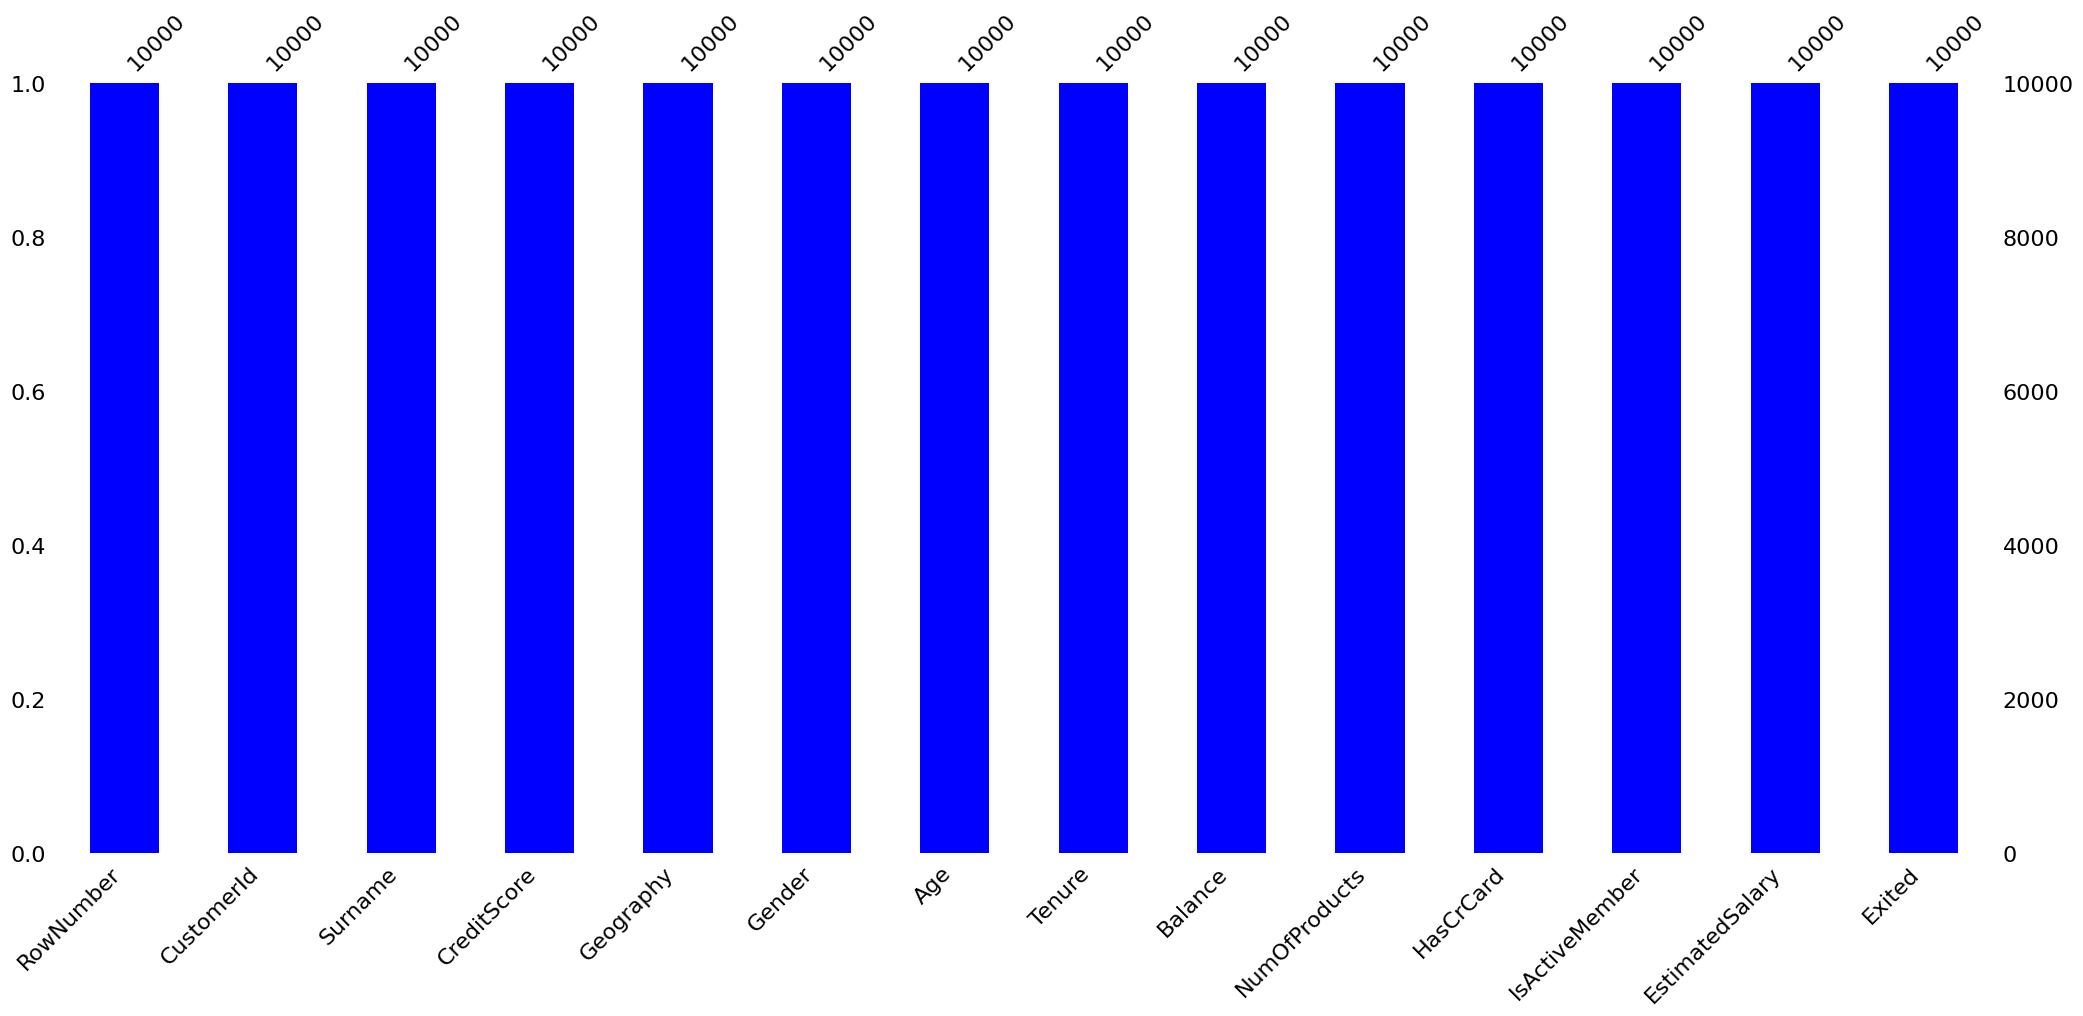

In [19]:
import missingno
missingno.bar(df, color = "b")
plt.show()

# Exploratory Data Analysis

In [29]:
df.groupby('Geography')[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [30]:
df.groupby('Gender')[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']].mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [ ]:
sns.barplot(df['Exited'])
plt.plot

# Data Preprocessing

## Drop Unuseable Columns

In [114]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Variables

In [21]:
df.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

### Check Unique Values

In [22]:
pd.DataFrame(df['Gender'].unique(), columns=['Gender'])

,Gender
0,Female
1,Male


In [23]:
pd.DataFrame(df['Geography'].unique(), columns=['Geography'])

,Geography
0,France
1,Spain
2,Germany


In [117]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype='int')
df_encoded.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [50]:
# # Importing OneHotEncoding
# from sklearn.preprocessing import OneHotEncoder
# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(drop='first', sparse=False)
# # Step 2: Fit and transform the selected columns
# encoded_cols = encoder.fit_transform(df[['Geography', 'Gender']])
# encoded_cols

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.]])

In [55]:
# encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Geography', 'Gender']))
# encoded_df

,Geography_Germany,Geography_Spain,Gender_Male
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,0.0,0.0,1.0
9997,0.0,0.0,0.0
9998,1.0,0.0,1.0


In [56]:
# df_encoded = pd.concat([df, encoded_df], axis=1)
# # Drop Original Columns
# df_encoded.drop(['Geography', 'Gender'], axis=1, inplace=True)

# # Validate changes
# df_encoded.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0


# Correlation Matrix & Heatmap

In [79]:
df2 = df_encoded.drop(columns=['Exited'])
df2.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,0.0,0.0,0.0


<Axes: title={'center': 'Correlation with Exited'}>

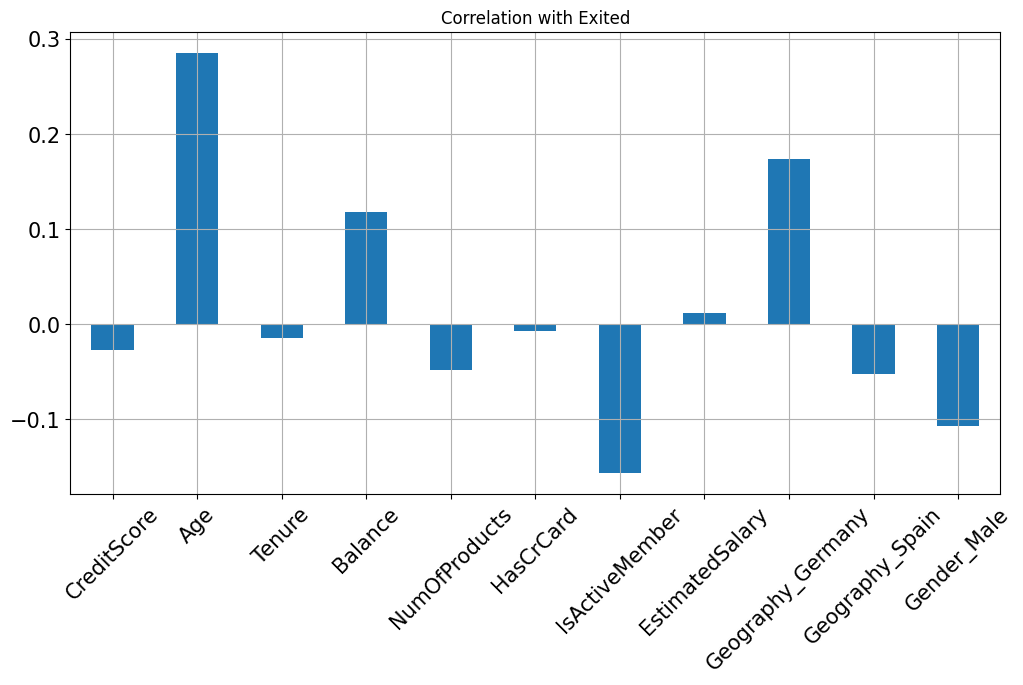

In [81]:
df2.corrwith(df['Exited']).plot.bar(
    figsize=(12, 6), title="Correlation with Exited", fontsize=15,
    rot=45, grid=True
)

__There correlation between target variable and `Age`, `Balance`, `IsActiveMember`, `Geography` & `Gender`.__

## Correlation

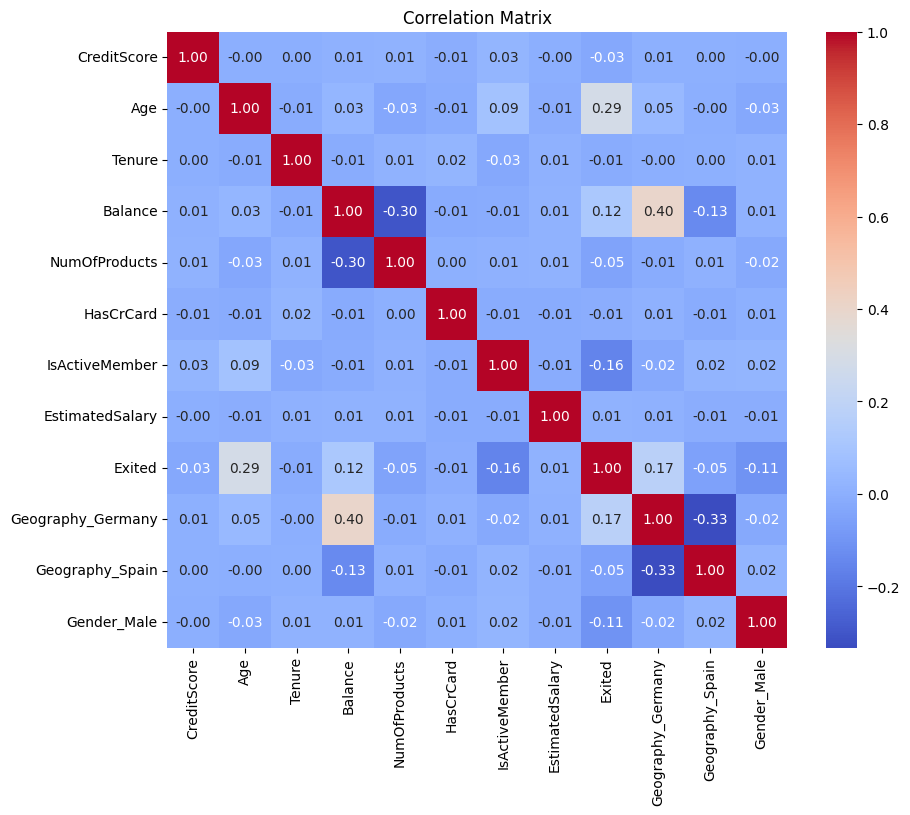

In [84]:
df_corr = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Preparing For Modelling

## Splitting Dataset to Train/Test Sets

In [85]:
df_encoded.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,0.0,0.0,0.0


In [118]:
# Seperating X, y
X = df_encoded.drop('Exited', axis=1).values
y = df_encoded['Exited'].values


print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (10000, 11)
Shape of y:  (10000,)


In [119]:
# Spliting Train & Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Check Shape of Train & Test sets
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (8000, 11)
X_test Shape:  (2000, 11)
y_train Shape:  (8000,)
y_test Shape:  (2000,)


## Feature Scaling
_Using StandardScaler for feature scaling_

In [120]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

## LogisticRegression

In [130]:
from sklearn.linear_model import LogisticRegression

# Creating instance of LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
# Fitting model
classifier_lr.fit(X_train, y_train)
# Make prediction on test set
y_pred = classifier_lr.predict(X_test)

### Check Accuracy Of LogisticRegression Model

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_lr = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall Score'])

model_lr

,Model,Accuracy,F1 Score,Precision,Recall Score
0,Logistic Regression,0.811,0.336842,0.581818,0.237037


In [132]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### Cross Validation On Logistic Regression

In [133]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)

print("Accuracy Mean: ", (accuracies.mean()*100))
print("Accuracy Standard Deviation: ", (accuracies.std()*100))

Accuracy Mean:  80.8375
Accuracy Standard Deviation:  0.8786530885395


## RandomForestClassifier

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Creating randomforest instances
classifier_rf = RandomForestClassifier(random_state=0)
# Fitting model
classifier_rf.fit(X_train, y_train)
# Prediction on test set
y_pred = classifier_rf.predict(X_test)

### Check Accuracy Of RandomForest Model

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_rf = pd.DataFrame([['Random Forest Classifier', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall Score'])

In [137]:
results = pd.concat([model_lr, model_rf], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall Score
0,Logistic Regression,0.811,0.336842,0.581818,0.237037
1,Logistic Regression,0.867,0.613372,0.745583,0.520988


In [140]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


### Cross Validation On RandomForest

In [139]:
accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

print("Accuracy Mean: ", (accuracies.mean()*100))
print("Accuracy Standard Deviation: ", (accuracies.std()*100))

Accuracy Mean:  85.9625
Accuracy Standard Deviation:  1.0186541365939672


## XGBoost

_GBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework._
[More Information](https://xgboost.readthedocs.io/en/latest/)

In [151]:
from xgboost import XGBClassifier

# Creating instance of XGBoost
classifier_xgb = XGBClassifier(random_state=0)
# Fitting Model
classifier_xgb.fit(X_train, y_train)
# Prediction on test set
y_pred = classifier_xgb.predict(X_test)

### Check Accuracy Of XGBoost Model

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_xgb = pd.DataFrame([['XGBoost Classifier', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall Score'])


In [153]:
results = pd.concat([model_lr, model_rf, model_xgb], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall Score
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest Classifier,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classifier,0.8525,0.594223,0.670807,0.533333


In [154]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1489  106]
 [ 189  216]]


### Cross Validation of XGBoost Model

In [155]:
accuracies = cross_val_score(estimator=classifier_xgb, X=X_train, y=y_train, cv=10)

print("Accuracy Mean: ", (accuracies.mean()*100))
print("Accuracy Standard Deviation: ", (accuracies.std()*100))

Accuracy Mean:  85.125
Accuracy Standard Deviation:  0.9953014618697171


# Hyperparameter Tunning Using RandomizedSearchCV
_We will perform hyperparamter search on XGBoost Algorithm_

In [157]:
from sklearn.model_selection import RandomizedSearchCV

# Creating params dict
parameters = {
    'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5 , 6, 7, 8 , 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

# Creating and fitting RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters, n_iter=5, n_jobs=-1, scoring='r2', cv=5, verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [159]:
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

Best Params: {'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.4}
Best Score: 0.16865682300986998


# XGBoost Modelling (Final Model)

In [176]:
# Best estimator
best_estimator = random_search.best_estimator_
# XGBoost instance based on best estimator found by RandomSearch
classifier= best_estimator
# Fitting tuned XGBoost
classifier.fit(X_train, y_train)
# Predicition on test set
y_pred = classifier.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_classifier = pd.DataFrame([['XGBoost Classifier Tuned', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall Score'])


In [178]:
results = pd.concat([model_lr, model_rf, model_xgb, model_classifier], ignore_index=True)
results

,Model,Accuracy,F1 Score,Precision,Recall Score
0,Logistic Regression,0.8110,0.336842,0.581818,0.237037
1,Random Forest Classifier,0.8670,0.613372,0.745583,0.520988
2,XGBoost Classifier,0.8525,0.594223,0.670807,0.533333
3,XGBoost Classifier Tuned,0.8650,0.612069,0.731959,0.525926


## Cross Validation

In [179]:
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Accuracy Mean: ", (accuracies.mean()*100))
print("Accuracy Standard Deviation: ", (accuracies.std()*100))

Accuracy Mean:  86.37499999999999
Accuracy Standard Deviation:  0.9370832406995664
